In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing the dataset using dask
# Dask can process data that doesn't fit into memory by breaking it down 
# into smaller, manageable chunks and processing these chunks in parallel.

data = pd.read_csv('/Users/tothhannapanna/Desktop/Project Portfolio/Cyber Security/Fraud Detection in transactions/Fraud_log.csv')

print(data.shape)

(6362620, 11)


In [3]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
74247,10,CASH_IN,702363.89,C194439854,2255173.81,2957537.70,C2078011503,1873190.85,1342688.22,0,0
3272373,251,CASH_IN,104826.78,C808481070,0.00,104826.78,C1595173915,272496.39,167669.61,0,0
1618592,157,CASH_IN,203485.33,C151107797,290.00,203775.33,C1899055666,0.00,0.00,0,0
3314952,252,TRANSFER,908328.30,C608237786,10604.00,0.00,C1910563557,57145.99,965474.28,0,0
6087562,522,CASH_OUT,2437.38,C650663061,49772.00,47334.62,C523604111,494714.42,497151.80,0,0
744956,38,PAYMENT,6983.64,C662979492,10130.00,3146.36,M418385479,0.00,0.00,0,0
3520055,259,CASH_IN,97582.10,C263361712,727841.56,825423.66,C648948278,457549.99,359967.89,0,0
2277509,187,CASH_IN,30479.33,C1844965216,1876360.58,1906839.91,C1225507744,1892644.82,1862165.49,0,0
1213250,133,CASH_OUT,16909.47,C1480549775,29561.00,12651.53,C1672533465,2293786.18,2310695.65,0,0
4370452,310,CASH_IN,327355.62,C44417191,9565197.58,9892553.20,C1463427470,2881934.84,2554579.22,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#summary of the central tendency, dispersion, and shape of a dataset's 
# distribution, excluding NaN values.
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# number of frauds in dataset
# 0 - nonfraudulent 1 - fraudulent

data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

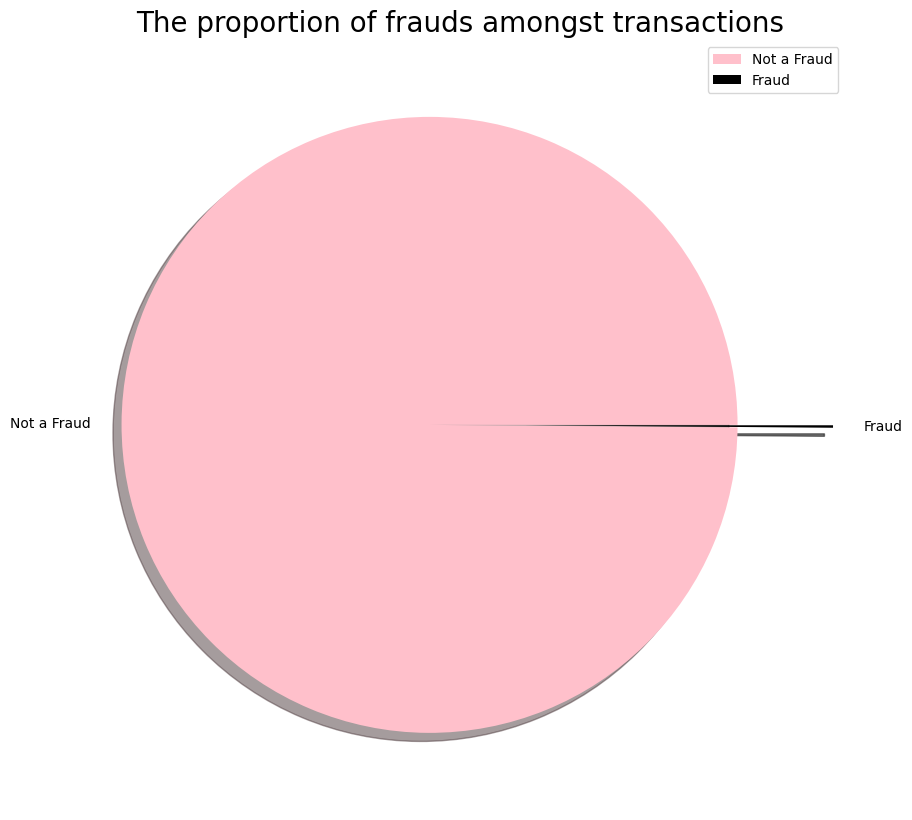

In [7]:
# The proportion of frauds amongst transactions 6354407, 8213

labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('The proportion of frauds amongst transactions',fontsize = 20)
plt.legend()
plt.show()

In [8]:
# frauds that are found/flagged
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

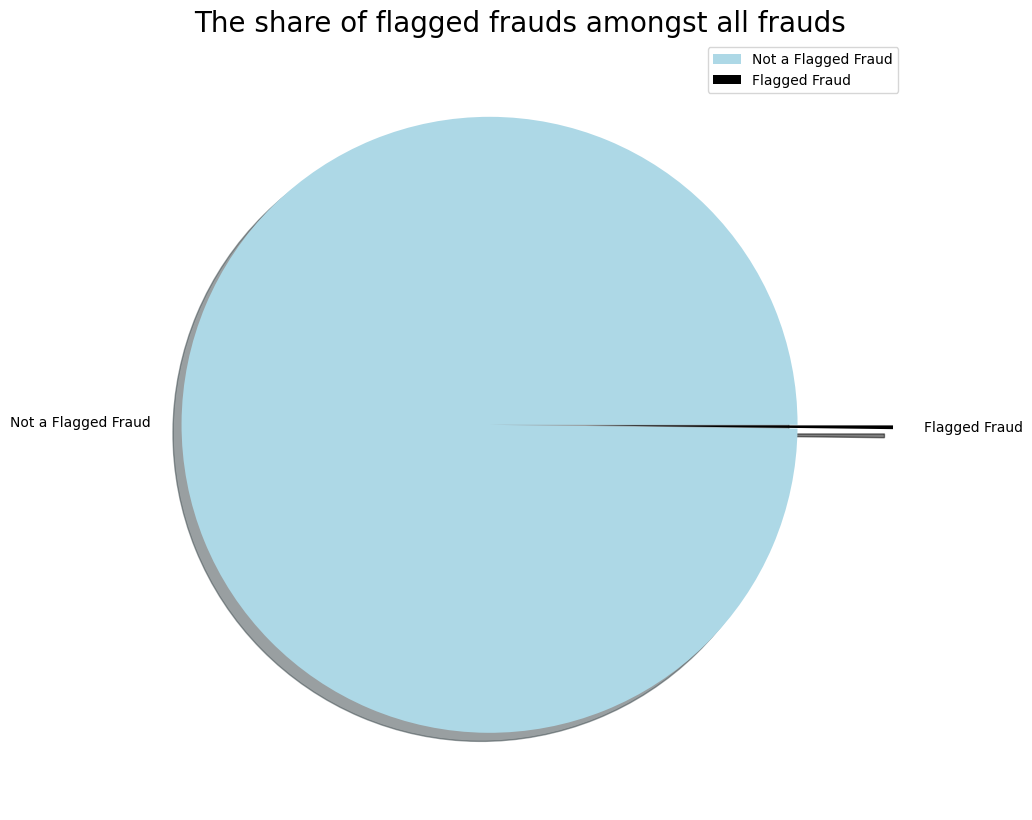

In [9]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [8213, 16]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('The share of flagged frauds amongst all frauds',fontsize = 20)
plt.legend()
plt.show()

In [10]:
# types of transactions in data set
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

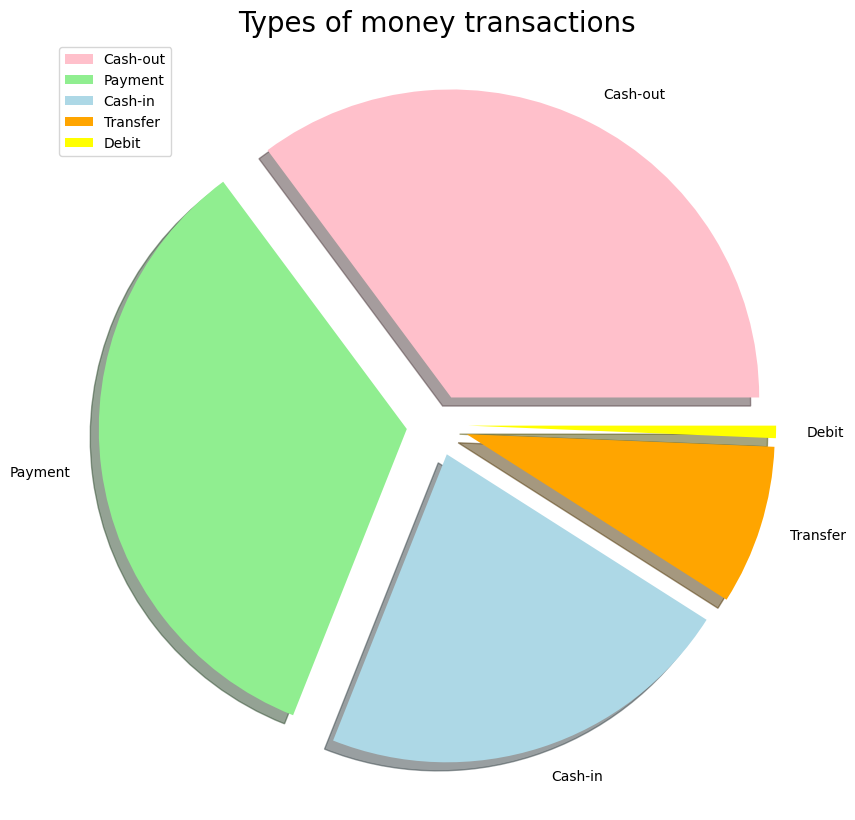

In [11]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('Types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [12]:
# checking the different types of steps involved in transactions

#x = data['step'].value_counts().nunique()
#print(x)

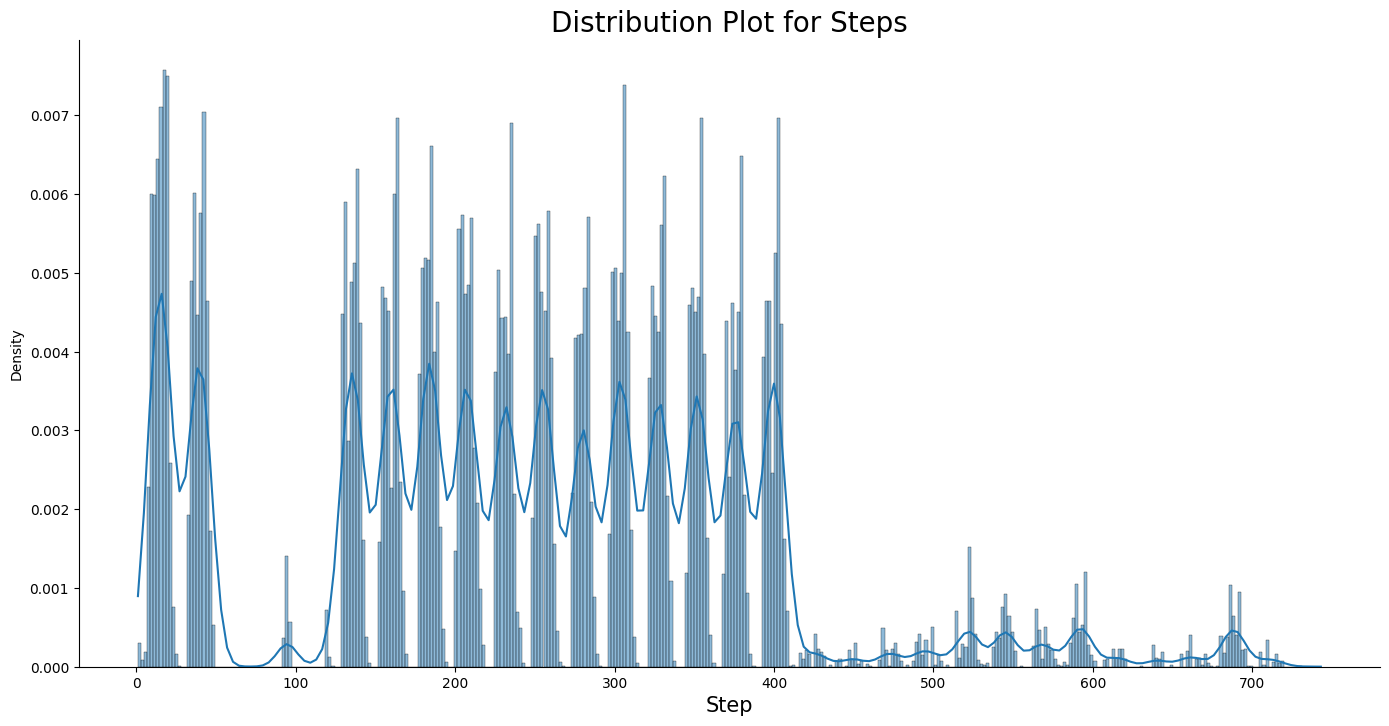

In [13]:
# distribution of steps
plt.rcParams['figure.figsize'] =(14, 7)

from scipy.stats import norm

plt.rcParams['figure.figsize'] = (14, 7)

# Using displot to create the histogram and fit a normal distribution
sns.displot(data['step'], kind="hist", kde=True, aspect=2, height=7, stat="density")
plt.title('Distribution Plot for Steps', fontsize=20)
plt.xlabel('Step', fontsize=15)
plt.show()

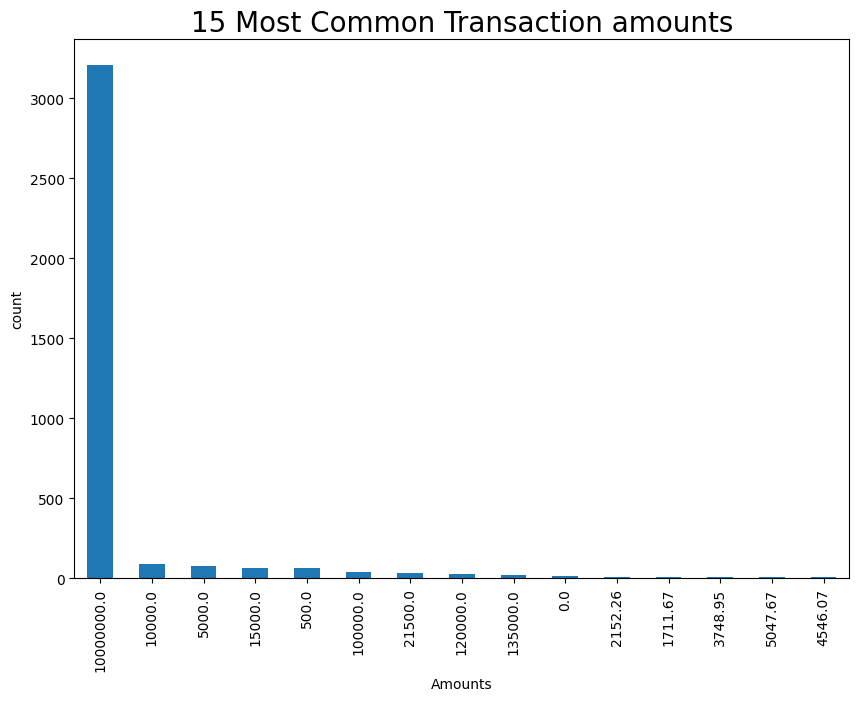

In [14]:
# 15 most commonnly transferred amounts

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

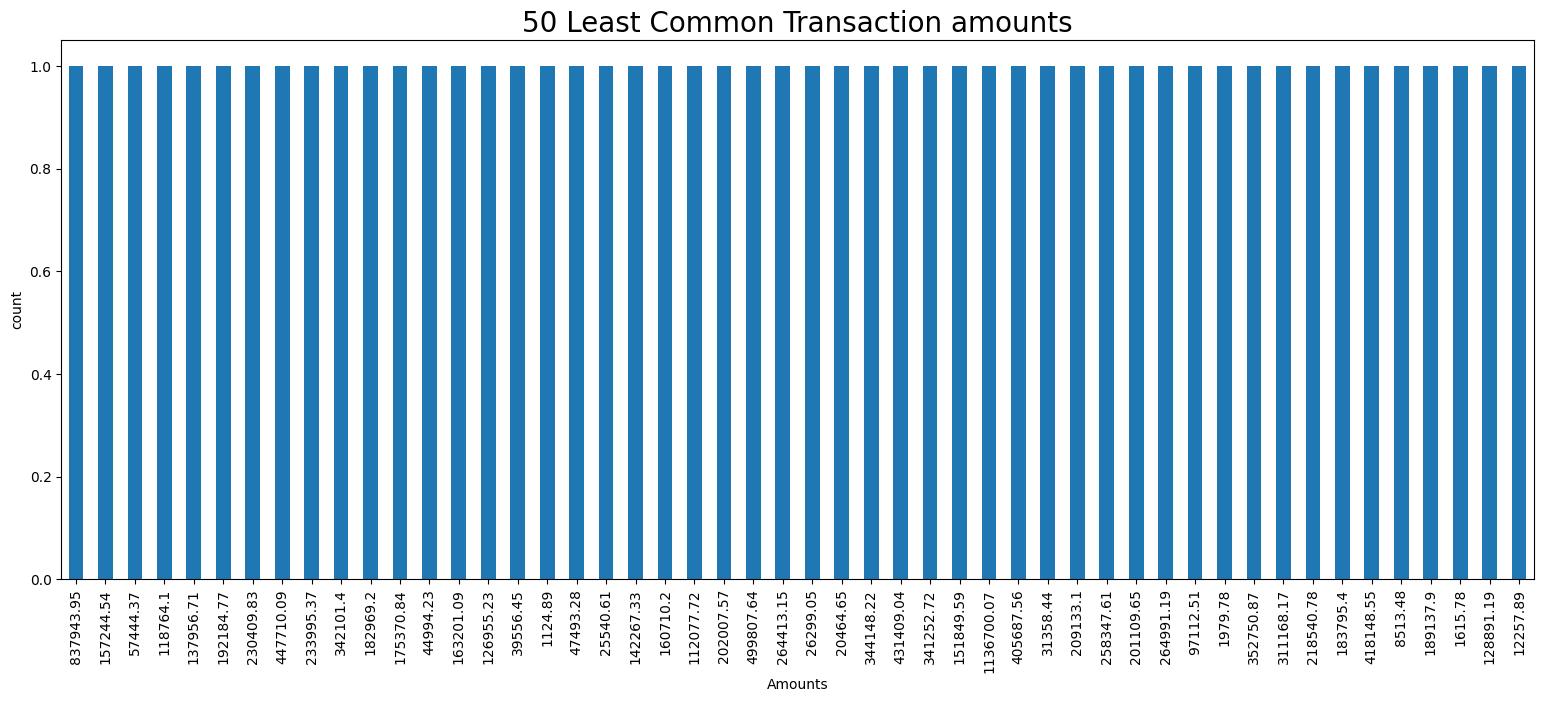

In [15]:
# 50 least common amounts transferred

plt.rcParams['figure.figsize'] = (19, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [16]:
# fraudulent transaction types out of all the transaction modes

print('The types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [17]:
# finding fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [18]:
# finding out the minimum and maximum transactions 

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [19]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [20]:
# the number of flagged fraudulent transactions
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the transaction mode being transfer
print("Minimum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())


The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [21]:
# Finding transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
5           1   PAYMENT     7817.71    C90045638       53860.00   
...       ...       ...         ...          ...            ...   
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0   

**Dataset where only Transfer Transactions are mentioned**

In [22]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


**Minimum Original old Balance for Flagged Frauds**

In [23]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds
# this table shows flagged frauds with minimum original old balance

dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


**Maximum Original Balance for Flagged Frauds**

In [24]:
# this table shows flagged frauds with maximum original old balance

dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1


**Minimum Original Old Balace for non-Flagged Frauds**

In [25]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
160646,12,TRANSFER,342317.15,C2070529657,0.00,0.0,C621118463,0.0,0.0,0,0
957368,44,TRANSFER,133711.48,C256147273,0.00,0.0,C1582233295,0.0,0.0,0,0
1248,1,TRANSFER,271161.74,C1658487789,0.00,0.0,C1219161283,0.0,0.0,0,0
175828,12,TRANSFER,18931.59,C257351690,0.00,0.0,C1108098323,0.0,0.0,0,0
282796,15,TRANSFER,421255.41,C1734485985,0.00,0.0,C981307359,0.0,0.0,0,0
381356,17,TRANSFER,630315.29,C2126290948,22.00,0.0,C1203344902,0.0,0.0,0,0
4965641,351,TRANSFER,63.80,C1293504491,63.80,0.0,C1368130863,0.0,0.0,1,0
277265,15,TRANSFER,119.00,C1995557473,119.00,0.0,C1480876722,0.0,0.0,1,0
6281815,653,TRANSFER,119.65,C1497766467,119.65,0.0,C543477940,0.0,0.0,1,0
1796322,162,TRANSFER,151.00,C1172437299,151.00,0.0,C315826176,0.0,0.0,1,0


**Maximum Original Old Balance for Non-Flagged Frauds**

In [26]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996403,425,TRANSFER,10000000.0,C1619838170,39585040.37,29585040.37,C1934167334,0.0,0.0,1,0
6281476,646,TRANSFER,10000000.0,C130070267,40399045.08,30399045.08,C970791522,0.0,0.0,1,0
6266405,617,TRANSFER,10000000.0,C794290057,42542664.27,32542664.27,C262998076,0.0,0.0,1,0
5563705,387,TRANSFER,10000000.0,C576718894,44892193.09,34892193.09,C673002421,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362454,730,TRANSFER,10000000.0,C507645439,47316255.05,37316255.05,C270374999,0.0,0.0,1,0
5996401,425,TRANSFER,10000000.0,C1551381510,49585040.37,39585040.37,C1042012237,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0


In [27]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = data.loc[data.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 19585040.37


In [28]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

# Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within 
# transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns 
# out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions 
# that have isFlaggedFraud set have transacted more than once.

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [29]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: 353874.22
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 19585040.37


In [30]:
data['nameDest'].value_counts().head(20)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C998351292      89
C716083600      89
C909295153      88
Name: nameDest, dtype: int64

In [31]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]


# shape of x
X.shape


(2770409, 11)

In [32]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [33]:
# feature engg.

X.loc[:, 'errorBalanceOrig'] = X['newbalanceOrig'] + X['amount'] - X['oldbalanceOrg']
X.loc[:, 'errorBalanceDest'] = X['oldbalanceDest'] + X['amount'] - X['newbalanceDest']


/var/folders/jv/kyfzy8yx1jj8gfcb8sytyjv00000gn/T/ipykernel_26463/2832837162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'errorBalanceOrig'] = X['newbalanceOrig'] + X['amount'] - X['oldbalanceOrg']
/var/folders/jv/kyfzy8yx1jj8gfcb8sytyjv00000gn/T/ipykernel_26463/2832837162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'errorBalanceDest'] = X['oldbalanceDest'] + X['amount'] - X['newbalanceDest']


In [34]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

In [35]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [36]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [37]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

False

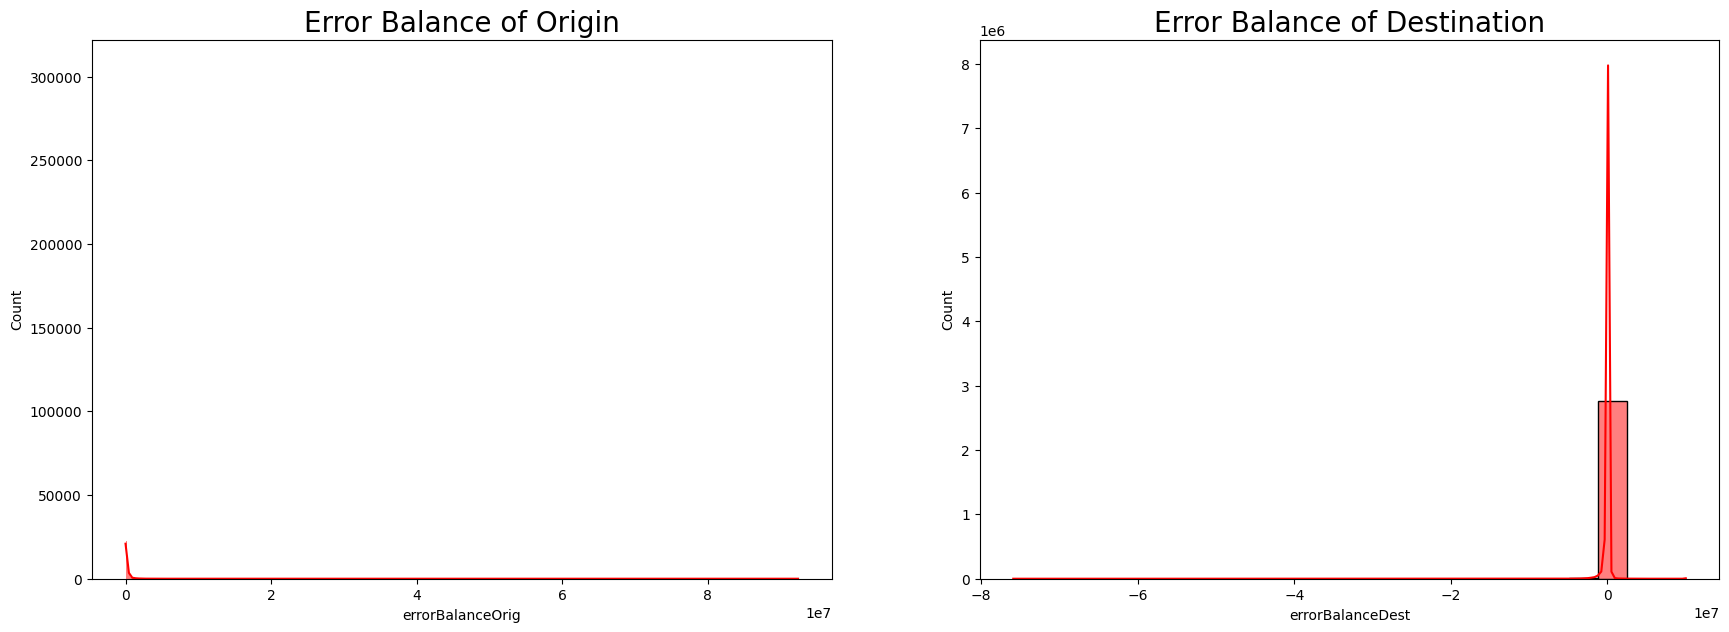

In [38]:
# visualizing the distribution of errorbalance

plt.rcParams['figure.figsize'] = (21, 7)

# Plotting the error balance of origin
plt.subplot(121)  # This sets up the first subplot in a 1x2 grid
sns.histplot(X['errorBalanceOrig'], color='red', kde=True)  # Adding a KDE curve
plt.title('Error Balance of Origin', fontsize=20)

# Plotting the error balance of destination
plt.subplot(122)  # This sets up the second subplot in the same grid
sns.histplot(X['errorBalanceDest'], color='red', kde=True)  # Adding a KDE curve
plt.title('Error Balance of Destination', fontsize=20)

# Display the plots
plt.show()



In [39]:
X['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [40]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)


Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [41]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


**OVER-SAMPLING**

In [43]:
import pandas as pd
from sklearn.utils import resample

# Combine them into one DataFrame for easier manipulation
data = pd.concat([X, Y], axis=1)

# Separate majority and minority classes
majority = data[data[Y.name] == 0]
minority = data[data[Y.name] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,     # Sample with replacement
                              n_samples=len(majority),    # Match number in majority class
                              random_state=123) # Reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Shuffle the dataset to mix up the row order
upsampled = upsampled.sample(frac=1, random_state=123)

# Split features and target
X_resampled = upsampled.drop([Y.name], axis=1)
Y_resampled = upsampled[Y.name]


In [44]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=0)


In [45]:
# applying standard scaling to the data to standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [46]:
# Model Training and Evaluation Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, confusion_matrix

# Initialize the model
model = LogisticRegression()

# Fit the model
model.fit(x_train, y_train)

# Predict test set results
y_pred = model.predict(x_test)

# Evaluate the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


The Area under Precision Recall Curve Score is 0.9206505742767288
[[520854  31436]
 [ 28388 524201]]
